<a href="https://colab.research.google.com/github/rohitLanjewar03/Machine-Learning/blob/main/ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
df = pd.read_csv('/Housing.csv')
display(df.head())
print(df.isnull().sum())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [13]:
X = df[['area', 'bedrooms', 'stories']]
y = df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [8]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression Metrics:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")

Linear Regression Metrics:
MAE: 1230704.9331823809
MSE: 2784597954908.523
RMSE: 1668711.4654452768


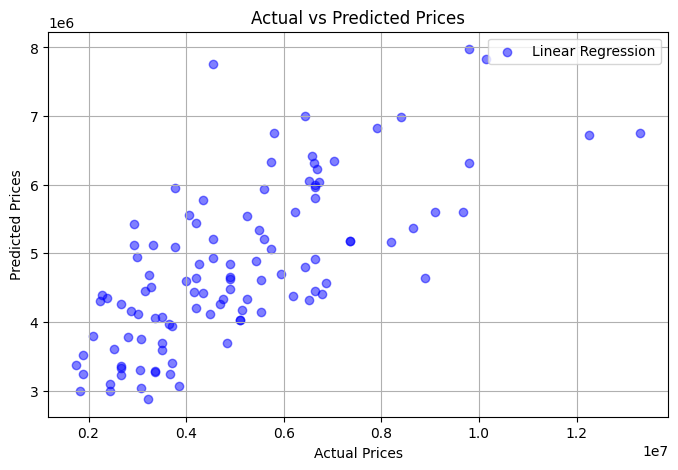

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

BONUS ASSIGNMENT

In [14]:
k_values = [3, 5, 7]
mae_knn, mse_knn, rmse_knn = [], [], []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    mae_knn.append(mean_absolute_error(y_test, y_pred_knn))
    mse_knn.append(mean_squared_error(y_test, y_pred_knn))
    rmse_knn.append(np.sqrt(mse_knn[-1]))

In [15]:
for i, k in enumerate(k_values):
    print(f"KNN Regression (k={k}) Metrics:")
    print(f"MAE: {mae_knn[i]}")
    print(f"MSE: {mse_knn[i]}")
    print(f"RMSE: {rmse_knn[i]}")
    print("-")

KNN Regression (k=3) Metrics:
MAE: 1424296.636085627
MSE: 3769828661060.142
RMSE: 1941604.6613716558
-
KNN Regression (k=5) Metrics:
MAE: 1320129.3577981652
MSE: 3261551724495.413
RMSE: 1805976.6677605258
-
KNN Regression (k=7) Metrics:
MAE: 1335086.4220183487
MSE: 3353133983820.1836
RMSE: 1831156.4607701285
-


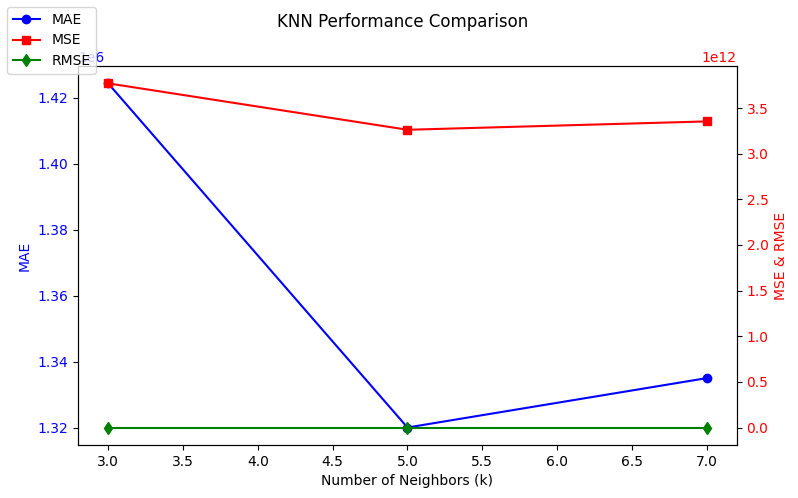

In [25]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel("Number of Neighbors (k)")
ax1.set_ylabel("MAE", color="blue")
ax1.plot(k_values, mae_knn, marker="o", linestyle="-", color="blue", label="MAE")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()  # Create a second y-axis
ax2.set_ylabel("MSE & RMSE", color="red")
ax2.plot(k_values, mse_knn, marker="s", linestyle="-", color="red", label="MSE")
ax2.plot(k_values, rmse_knn, marker="d", linestyle="-", color="green", label="RMSE")
ax2.tick_params(axis="y", labelcolor="red")

fig.suptitle("KNN Performance Comparison")
fig.legend(loc="upper left")
fig.tight_layout()
plt.show()
